Importing all nescessary packages.

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib as plt
import seaborn as sns


Downloading & Printing the dataset

In [2]:
url = 'https://raw.githubusercontent.com/MilanBinsMathew/Software-Defect-Prediction-JM1/main/jm1_csv.csv'

In [3]:
df = pd.read_csv(url)
print(df.head())


     loc  v(g)  ev(g)  iv(g)  ...  total_Op  total_Opnd  branchCount  defects
0    1.1   1.4    1.4    1.4  ...       1.2         1.2          1.4        0
1    1.0   1.0    1.0    1.0  ...       1.0         1.0          1.0        1
2   72.0   7.0    1.0    6.0  ...     112.0        86.0         13.0        1
3  190.0   3.0    1.0    3.0  ...     329.0       271.0          5.0        1
4   37.0   4.0    1.0    4.0  ...      76.0        50.0          7.0        1

[5 rows x 22 columns]


Shuffling the dataset.
Segementation into training and test set (80% - 20%)
Normalizing the values

In [4]:
from sklearn.model_selection import train_test_split

X = df[['loc','v(g)','ev(g)','iv(g)','b','n']].values

y = df['defects'].values




Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=[-1,1])
X = scaler.fit_transform(X) 

train_X,test_X,train_Y,test_Y = train_test_split(X, y, test_size=0.2, random_state = 2)





Keras Model Definition

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import BinaryCrossentropy

In [7]:
model = Sequential([ 
(Dense(512,activation = 'relu',kernel_initializer='he_uniform',input_shape = (6,))),
(BatchNormalization()),
(Dense(512,activation = 'relu')),

(BatchNormalization()),
(Dense(256,activation = 'relu')),
(Dense(1,activation = 'sigmoid'))
])
ad = SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer = ad, loss='binary_crossentropy',metrics = ['accuracy'])

Training

In [8]:
model.fit(x = train_X, y = train_Y, batch_size = 64, epochs=50)
model.summary()

Epoch 1/50
137/137 [==============================] - 2s 12ms/step - loss: 0.4821 - accuracy: 0.7985
Epoch 2/50
137/137 [==============================] - 2s 12ms/step - loss: 0.4498 - accuracy: 0.8129
Epoch 3/50
137/137 [==============================] - 2s 12ms/step - loss: 0.4463 - accuracy: 0.8137
Epoch 4/50
137/137 [==============================] - 2s 12ms/step - loss: 0.4444 - accuracy: 0.8117
Epoch 5/50
137/137 [==============================] - 2s 11ms/step - loss: 0.4448 - accuracy: 0.8129
Epoch 6/50
137/137 [==============================] - 2s 12ms/step - loss: 0.4430 - accuracy: 0.8138
Epoch 7/50
137/137 [==============================] - 2s 11ms/step - loss: 0.4407 - accuracy: 0.8153
Epoch 8/50
137/137 [==============================] - 1s 10ms/step - loss: 0.4409 - accuracy: 0.8152
Epoch 9/50
137/137 [==============================] - 2s 11ms/step - loss: 0.4403 - accuracy: 0.8163
Epoch 10/50
137/137 [==============================] - 2s 12ms/step - loss: 0.4387 - accura

Results

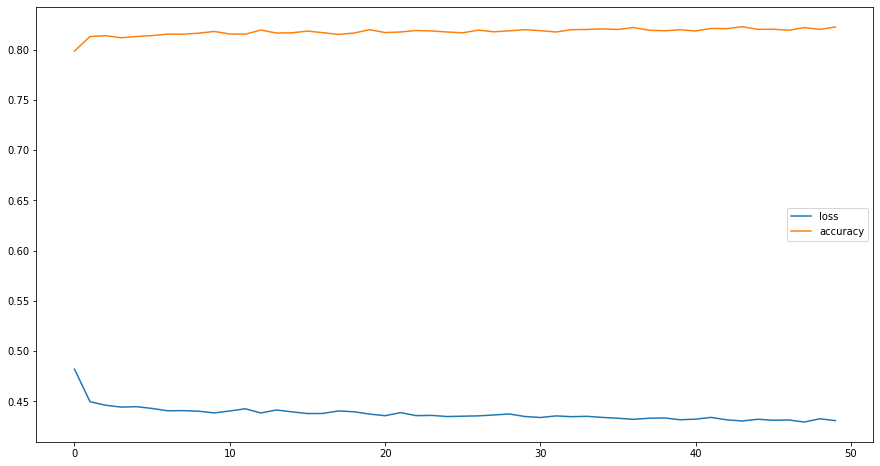

In [9]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(15,8))

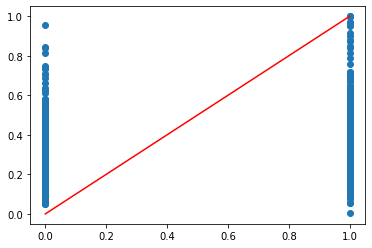

In [10]:
y_pred = model.predict(test_X)

from sklearn import metrics


fig = plt.pyplot.plot(figsize=(10,5))
plt.pyplot.scatter(test_Y,y_pred)

plt.pyplot.plot(test_Y,test_Y,'r')

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score



y_pred = (y_pred >= 0.65).astype(int).ravel()

accuracy = accuracy_score(test_Y, y_pred)
print('Accuracy: %f' % accuracy)

precision = precision_score(test_Y, y_pred)
print('Precision: %f' % precision)

recall = recall_score(test_Y, y_pred)
print('Recall: %f' % recall)

f1 = f1_score(test_Y, y_pred)
print('F1 score: %f' % f1)



Accuracy: 0.811208
Precision: 0.694444
Recall: 0.058824
F1 score: 0.108460
